Linear Regression - Car Price Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis and Pre-processing Steps

In [2]:
cars=pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Splitting company name from CarName column
CompanyName=cars['CarName'].apply(lambda x:x.split(' ')[0])
CompanyName

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [6]:
cars.insert(3,"CompanyName",CompanyName)
cars.drop(["CarName"],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

 There seems to be some spelling error in the CompanyName column.
        maxda = mazda
        Nissan = nissan
        porsche = porcshce
        toyota = toyouta
        vokswagen = volkswagen = vw

In [8]:
cars.CompanyName=cars.CompanyName.str.lower()
cars.CompanyName

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CompanyName, Length: 205, dtype: object

In [9]:
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)
replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Feature Engineering

In [11]:
cars['fueleconomy']=(0.55*cars['citympg'])+(0.45*cars['highwaympg'])
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
# Binning the Car Companies based on avg prices of each Company.
cars['price']=cars['price'].astype(int)
temp=cars.copy()
table=temp.groupby(["CompanyName"])['price'].mean()
temp=temp.merge(table.reset_index(),how='left',on='CompanyName')
bins=[0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange']=pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,Medium
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,Medium
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,Medium
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,Medium


Find High Correlations between Features

In [14]:
cor=cars.corr(numeric_only=True)
cor

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [15]:
# Check the corr values of final list of variables
# Find out the Fields with high correlation
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.874587475964264 -- 3 -- 2 -- carlength -- wheelbase
0.8411182684818453 -- 4 -- 3 -- carwidth -- carlength
0.8777284608306433 -- 6 -- 3 -- curbweight -- carlength
0.8670324646791233 -- 6 -- 4 -- curbweight -- carwidth
0.850594073426277 -- 7 -- 6 -- enginesize -- curbweight
0.8097686545377302 -- 11 -- 7 -- horsepower -- enginesize
0.8014561756662708 -- 13 -- 11 -- citympg -- horsepower
0.9713370423425045 -- 14 -- 13 -- highwaympg -- citympg
0.835305437204371 -- 15 -- 6 -- price -- curbweight
0.8741451426986426 -- 15 -- 7 -- price -- enginesize
0.8081381197889799 -- 15 -- 11 -- price -- horsepower
0.9938444201653043 -- 16 -- 13 -- fueleconomy -- citympg
0.9916921560568324 -- 16 -- 14 -- fueleconomy -- highwaympg


In [16]:
print(cor.columns)
print("..................")
print(correlated_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')
..................
{'carlength', 'wheelbase', 'horsepower', 'carwidth', 'highwaympg', 'curbweight', 'fueleconomy', 'citympg', 'price', 'enginesize'}


In [17]:
cor['highwaympg']['citympg']

0.9713370423425045

In [18]:
corh = cars[list(correlated_features)].corr()
corh

,carlength,wheelbase,horsepower,carwidth,highwaympg,curbweight,fueleconomy,citympg,price,enginesize
carlength,1.000000,0.874587,0.552623,0.841118,-0.704662,0.877728,-0.691472,-0.670909,0.682921,0.683360
wheelbase,0.874587,1.000000,0.353294,0.795144,-0.544082,0.776386,-0.508136,-0.470414,0.577816,0.569329
horsepower,0.552623,0.353294,1.000000,0.640732,-0.770544,0.750739,-0.792822,-0.801456,0.808138,0.809769
carwidth,0.841118,0.795144,0.640732,1.000000,-0.677218,0.867032,-0.663419,-0.642704,0.759325,0.735433
highwaympg,-0.704662,-0.544082,-0.770544,-0.677218,1.000000,-0.797465,0.991692,0.971337,-0.697600,-0.677470
curbweight,0.877728,0.776386,0.750739,0.867032,-0.797465,1.000000,-0.781535,-0.757414,0.835305,0.850594
fueleconomy,-0.691472,-0.508136,-0.792822,-0.663419,0.991692,-0.781535,1.000000,0.993844,-0.696214,-0.669464
citympg,-0.670909,-0.470414,-0.801456,-0.642704,0.971337,-0.757414,0.993844,1.000000,-0.685752,-0.653658
price,0.682921,0.577816,0.808138,0.759325,-0.697600,0.835305,-0.696214,-0.685752,1.000000,0.874145
enginesize,0.683360,0.569329,0.809769,0.735433,-0.677470,0.850594,-0.669464,-0.653658,0.874145,1.000000


<Axes: >

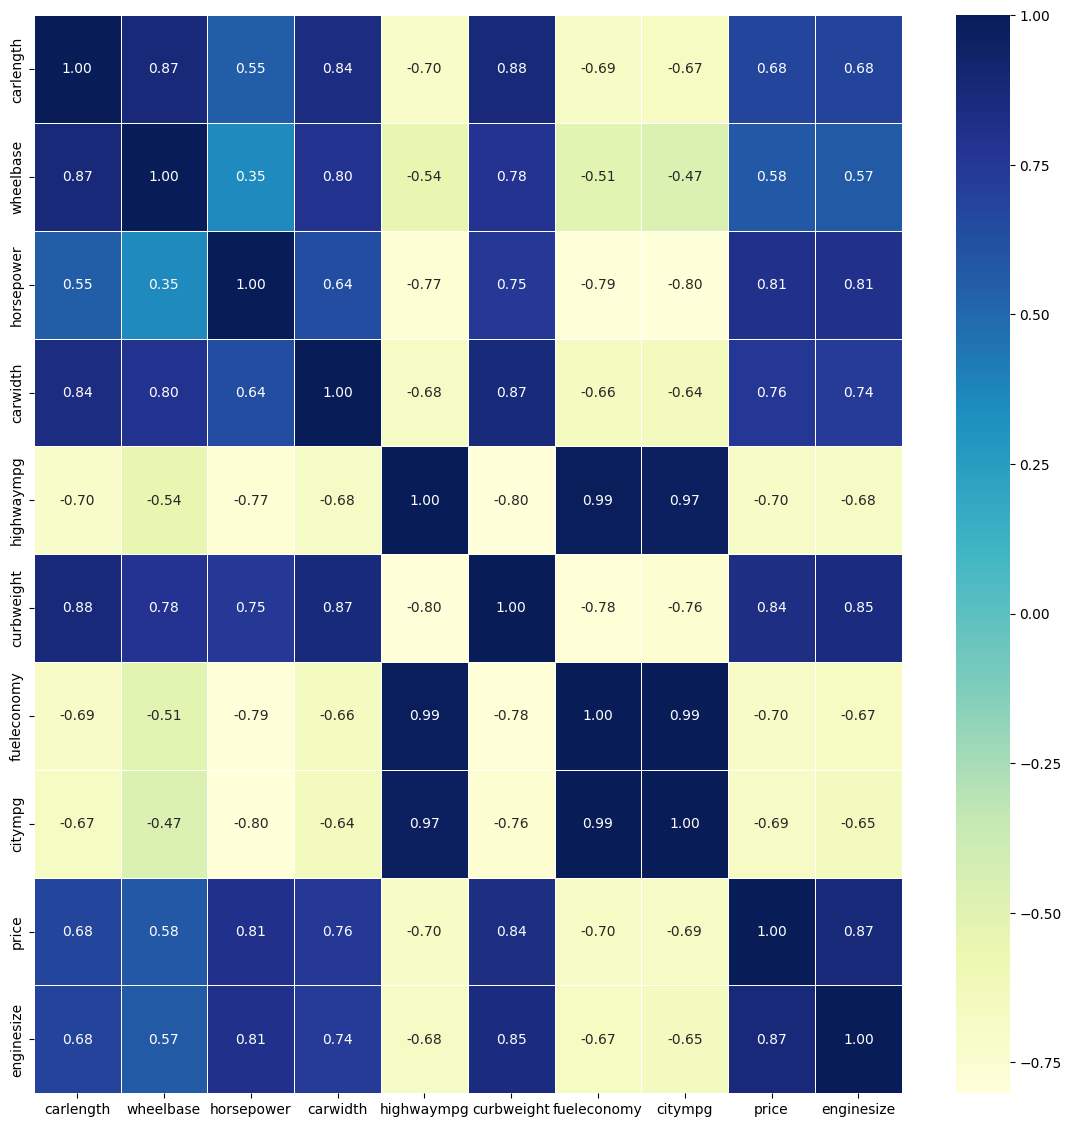

In [19]:
# Produce a Heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corh,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")

Feature Engineering: Create Dummy Variables for Ordinal Variables

In [20]:
print(cars['fueltype'].unique())
print(cars['aspiration'].unique())
print(cars['carbody'].unique())
print(cars['drivewheel'].unique())
print(cars['enginetype'].unique())
print(cars['cylindernumber'].unique())
print(cars['carsrange'].unique())
print(cars['fuelsystem'].unique())
print(cars['CompanyName'].unique())
print(cars['doornumber'].unique())
print(cars['enginelocation'].unique())

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['Medium', 'Highend', 'Budget']
Categories (3, object): ['Budget' < 'Medium' < 'Highend']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['two' 'four']
['front' 'rear']


In [21]:
# Defining the map function

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_lr

cars_lr = cars
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('CompanyName',cars_lr)
cars_lr = dummies('doornumber',cars_lr)
cars_lr = dummies('enginelocation',cars_lr)
cars_lr = dummies('fuelsystem',cars_lr)

cars_lr.info()

In [22]:
cars_lr.shape

(205, 69)


Train-Test Split and Feature Scaling


In [23]:
from sklearn.model_selection import train_test_split as tts
df_train,df_test=tts(cars_lr,train_size=0.7,test_size=0.3,random_state=100)
df_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,...,False,False,False,True,False,False,False,False,False,False
125,126,3,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,...,False,True,False,False,False,False,False,True,False,False
166,167,1,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,...,False,True,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,True,False,False,False,False,False,True,False,False
199,200,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,1,96.3,172.4,65.4,51.6,2403,110,3.17,3.46,...,False,False,False,False,False,False,False,False,True,False
103,104,0,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,...,False,False,False,False,False,False,False,True,False,False
67,68,-1,110.0,190.9,70.3,56.5,3515,183,3.58,3.64,...,False,False,False,False,False,True,False,False,False,False
24,25,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,...,False,False,False,True,False,False,False,False,False,False


In [24]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
num_vars = ['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars]=sc.fit_transform(df_train[num_vars])
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,False,False,False,True,False,False,False,False,False,False
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,False,True,False,False,False,False,False,True,False,False
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,False,True,False,False,False,False,False,True,False,False
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,False,True,False,False,False,False,False,True,False,False
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,True,False,False,False,False,False,False,True,False,False


In [25]:
#Dividing data into X and y variables
y_train=df_train['price']
x_train=df_train
print(y_train)

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [27]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model  sm.OLS.fit(y,x)
    print(lm.summary())    # model summary
    return lm

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [30]:
checkVIF(x_train)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Create the first model and clean up features with Colinearity

In [31]:
model1=build_model(x_train,y_train)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).